In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
import os
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from scipy.io import loadmat
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("./coclust_mod_impute_cstr_mar/")

In [3]:
def chargement(dataset, initial_type=["CA", "zero"], missing_type=["mar"], probas=[0.1,0.2,0.5,0.7]):
    return [[load(f"./{dataset}-{miss}-{proba}-{ini}.joblib") for proba in probas] for ini in initial_type for miss in missing_type]

In [4]:
def rmse(predictions, targets, ):
    idx=...#targets!=0
    return np.sqrt(((predictions[idx] - targets[idx]) ** 2).mean())

In [5]:
def compte_rendu(dataset, real_partition, initial_type=["CA", "zero"], missing_type=["mar"], probas=[0.1,0.2,0.5,0.7]):
    model_seria=chargement(dataset, initial_type=initial_type, missing_type=missing_type, probas=probas)
    hyper_param=[f"{ini}_{miss}"for ini in initial_type for miss in missing_type]
    models_rmse=pd.DataFrame({f"{dataset}_{nom}_RMSE":[rmse(model["imputed"], model["real"]) for model in models] for nom, models in zip(hyper_param, model_seria)}, index=probas)    
    models_rmse.plot()
    models_nmi=pd.DataFrame({f"{dataset}_{nom}_NMI":[NMI(model["z"], real_partition) for model in models] for nom, models in zip(hyper_param, model_seria)}, index=probas)    
    models_nmi.plot()
    return models_rmse, models_nmi

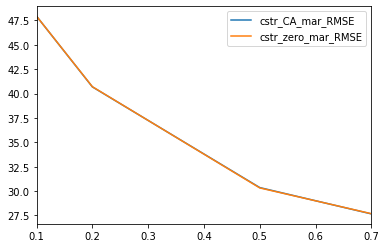

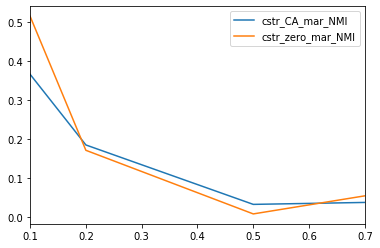

In [6]:
partition_cstr=loadmat("../complete_data/cstr.mat")["gnd"][:,0]
filename="cstr"
cstrRMSE, cstrNMI=compte_rendu(filename, partition_cstr)

In [7]:
cstrNMI

,cstr_CA_mar_NMI,cstr_zero_mar_NMI
0.1,0.366026,0.514398
0.2,0.185292,0.171606
0.5,0.033312,0.008930
0.7,0.038284,0.055175


In [8]:
cstrRMSE

,cstr_CA_mar_RMSE,cstr_zero_mar_RMSE
0.1,47.921873,47.921141
0.2,40.679952,40.698349
0.5,30.358828,30.322344
0.7,27.657873,27.680208
